# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [150]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [151]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [152]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [153]:
websites.describe

<bound method NDFrame.describe of           URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET   
0      M0_109          16                          7  iso-8859-1  \
1     B0_2314          16                          6       UTF-8   
2      B0_911          16                          6    us-ascii   
3      B0_113          17                          6  ISO-8859-1   
4      B0_403          17                          6       UTF-8   
...       ...         ...                        ...         ...   
1776    M4_48         194                         16       UTF-8   
1777    M4_41         198                         17       UTF-8   
1778   B0_162         201                         34       utf-8   
1779  B0_1152         234                         34  ISO-8859-1   
1780   B0_676         249                         40       utf-8   

                      SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO   
0                      nginx           263.0           NaN            Na

In [154]:
websites.isna()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,False,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1777,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1779,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [156]:
# Your comment here
#Object, Int64 and Float64
#SERVER	CONTENT_LENGTH	WHOIS_COUNTRY	WHOIS_STATEPRO
#Type (0 or 1)
#Yes to run the algorithm we need to transform server, country and state at least

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

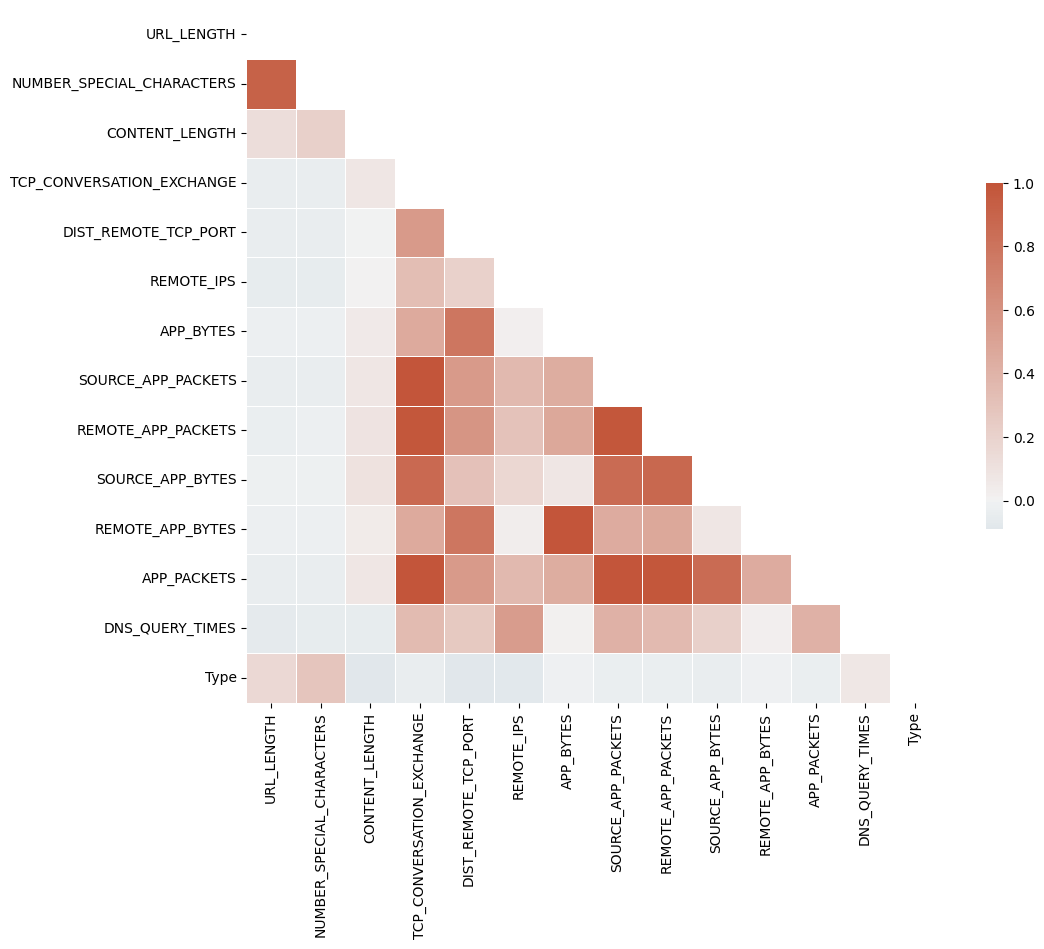

In [157]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Select only the numerical columns
numerical_data = websites.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [158]:
# Your comment here
#To chech the type benign or malicious, we will have to delete the number of special characters

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [159]:
# Drop the specific column you want to remove
columns_to_drop = [ 'TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'APP_BYTES','URL_LENGTH']
websites_clean = numerical_data.drop(columns=columns_to_drop)

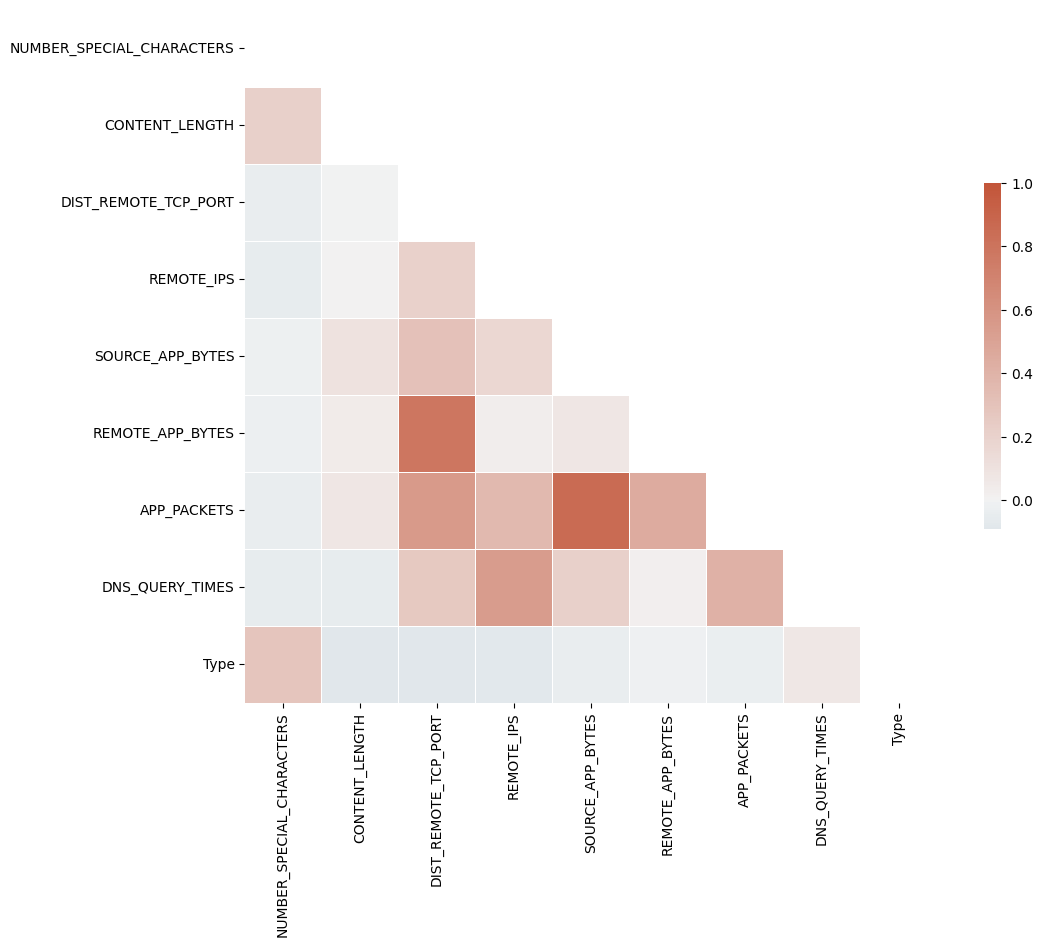

In [160]:
# Your code here

# Select only the numerical columns
numerical_data = websites_clean.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [161]:
# Your comment here

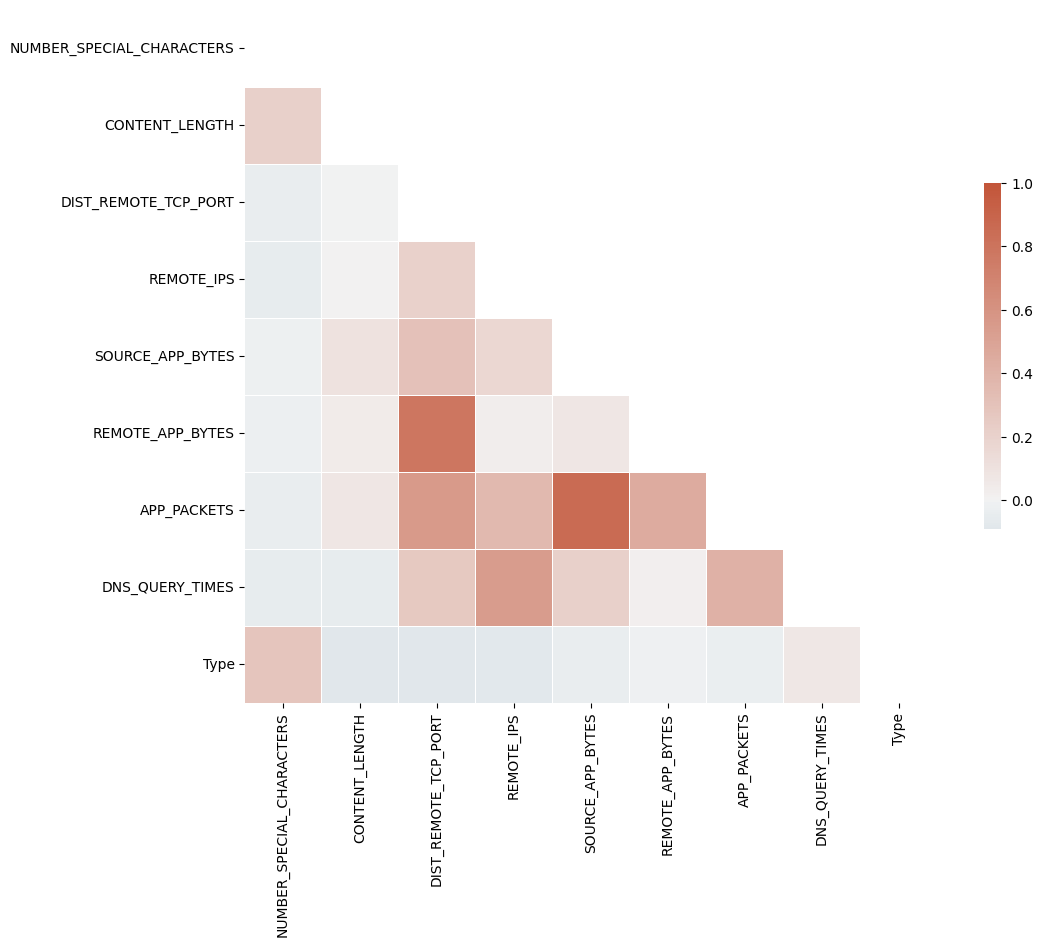

In [162]:
# Print heatmap again
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [163]:
numerical_data.shape[0]


1781

In [164]:
# Your code here
missing_values = numerical_data.isna().sum()
missing_values

NUMBER_SPECIAL_CHARACTERS      0
CONTENT_LENGTH               812
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [165]:
# Your code here
columns_to_drop = ['CONTENT_LENGTH']
websites_clean2 = numerical_data.drop(columns=columns_to_drop)

In [166]:
missing_ratio = websites_clean2.isnull().sum() / len(websites_clean2) * 100
missing_ratio


NUMBER_SPECIAL_CHARACTERS    0.000000
DIST_REMOTE_TCP_PORT         0.000000
REMOTE_IPS                   0.000000
SOURCE_APP_BYTES             0.000000
REMOTE_APP_BYTES             0.000000
APP_PACKETS                  0.000000
DNS_QUERY_TIMES              0.056148
Type                         0.000000
dtype: float64

In [167]:
total_missing_ratio = websites_clean2.isnull().sum().sum() / np.prod(websites_clean2.shape) * 100


In [168]:
total_missing_ratio


0.007018528916339136

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [169]:
# Examine missing values in each column
# Your code here
missing_values2 = websites_clean2.isna().sum()
missing_values2

NUMBER_SPECIAL_CHARACTERS    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [170]:
websites['WHOIS_COUNTRY']

0       NaN
1       NaN
2       NaN
3        US
4        US
       ... 
1776     ES
1777     ES
1778     US
1779     US
1780     US
Name: WHOIS_COUNTRY, Length: 1781, dtype: object

In [171]:
# Your code here
unique_values_list = list(websites['WHOIS_COUNTRY'].unique())
unique_values_list


[nan,
 'US',
 'SC',
 'GB',
 'UK',
 'RU',
 'AU',
 'CA',
 'PA',
 'se',
 'IN',
 'LU',
 'TH',
 "[u'GB'; u'UK']",
 'FR',
 'NL',
 'UG',
 'JP',
 'CN',
 'SE',
 'SI',
 'IL',
 'ru',
 'KY',
 'AT',
 'CZ',
 'PH',
 'BE',
 'NO',
 'TR',
 'LV',
 'DE',
 'ES',
 'BR',
 'us',
 'KR',
 'HK',
 'UA',
 'CH',
 'United Kingdom',
 'BS',
 'PK',
 'IT',
 'Cyprus',
 'BY',
 'AE',
 'IE',
 'UY',
 'KG']

In [172]:
len(unique_values_list)

49

In [173]:
country_code_mapping = {
    'Cyprus': 'CY',
    'us': 'US',
    'se': 'SE',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB',}
    


websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(country_code_mapping)


In [174]:
# Your code here
unique_values_list = list(websites['WHOIS_COUNTRY'].unique())
unique_values_list

[nan,
 'US',
 'SC',
 'GB',
 'UK',
 'RU',
 'AU',
 'CA',
 'PA',
 'SE',
 'IN',
 'LU',
 'TH',
 'FR',
 'NL',
 'UG',
 'JP',
 'CN',
 'SI',
 'IL',
 'ru',
 'KY',
 'AT',
 'CZ',
 'PH',
 'BE',
 'NO',
 'TR',
 'LV',
 'DE',
 'ES',
 'BR',
 'KR',
 'HK',
 'UA',
 'CH',
 'BS',
 'PK',
 'IT',
 'CY',
 'BY',
 'AE',
 'IE',
 'UY',
 'KG']

In [175]:
len(unique_values_list)

45

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

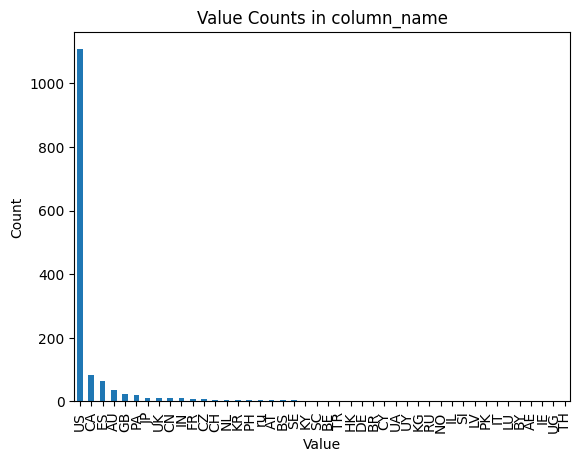

In [176]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts for a specific column
value_counts = websites['WHOIS_COUNTRY'].value_counts()

# Plot the bar chart
value_counts.plot(kind='bar')

# Add labels and title (optional)
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Value Counts in column_name')

# Show the plot
plt.show()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [177]:
# Your code here
top_10_values = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index

# Create a mask for values that are NOT in the top 10
mask = websites['WHOIS_COUNTRY'].isin(top_10_values)

# Replace the values NOT in the top 10 with 'OTHER'
websites.loc[mask, 'column_name'] = 'OTHER'

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [178]:
# Your code here
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_clean3 = websites.drop(columns=columns_to_drop)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [179]:
# Your code here
websites_clean3.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
column_name                   object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [180]:
# Your code here
websites_clean3.drop(columns='URL')

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,column_name
0,16,7,iso-8859-1,nginx,263.0,NaN,7,0,2,700,9,10,1153,832,9,2.0,1,NaN
1,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0,NaN
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,0,0,0,0,0,0,0,0,0,0.0,0,NaN
3,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0,OTHER
4,17,6,UTF-8,NaN,124140.0,US,57,2,5,4278,61,62,129889,4586,61,4.0,0,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,0,0,0,0,0,3,186,0,0,0.0,1,OTHER
1777,198,17,UTF-8,Apache,NaN,ES,0,0,0,0,0,2,124,0,0,0.0,1,OTHER
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,83,2,6,6631,87,89,132181,6945,87,4.0,0,OTHER
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,0,0,0,0,0,0,0,0,0,0.0,0,OTHER


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [181]:
# Your code here
websites_clean3['CHARSET']

0       iso-8859-1
1            UTF-8
2         us-ascii
3       ISO-8859-1
4            UTF-8
           ...    
1776         UTF-8
1777         UTF-8
1778         utf-8
1779    ISO-8859-1
1780         utf-8
Name: CHARSET, Length: 1781, dtype: object

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [182]:
# Your code here
websites_clean3['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
 

![Think Hard](../images/think-hard.jpg)

In [183]:
# Your comment here
#we can change to the name of the server regardless of the version, so we can divide by apache, microsoft, openssl etc

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [184]:
# Your code here
# Create conditions for each word you want to check for

websites_clean3['SERVER'] = websites_clean3['SERVER'].astype(str)
conditions = [
    (websites_clean3['SERVER'].str.contains('Apache', case=False)),
    (websites_clean3['SERVER'].str.contains('Microsoft', case=False)),
    (websites_clean3['SERVER'].str.contains('Nginx', case=False))
]

# Define the labels corresponding to the conditions
labels = ['Apache', 'Microsoft', 'Nginx']

# Use the `np.select` method to assign labels based on the conditions
import numpy as np
websites_clean3['SERVER'] = np.select(conditions, labels, default='OTHER')


In [185]:
# Count `SERVER` value counts here
websites_clean3['SERVER'].value_counts()

SERVER
Apache       643
OTHER        504
Nginx        436
Microsoft    198
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [192]:
# Your code here
website_dummy = pd.get_dummies(websites_clean3)


In [194]:
website_dummy.fillna(0, inplace=True)


In [195]:
website_dummy = website_dummy.astype(int)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [196]:
# Your code here
website_dummy.describe

<bound method NDFrame.describe of       URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH   
0             16                          7             263  \
1             16                          6           15087   
2             16                          6             324   
3             17                          6             162   
4             17                          6          124140   
...          ...                        ...             ...   
1776         194                         16               0   
1777         198                         17               0   
1778         201                         34            8904   
1779         234                         34               0   
1780         249                         40           24435   

      TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES   
0                             7                     0           2        700  \
1                            17                  

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [190]:
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_SI,WHOIS_COUNTRY_TH,WHOIS_COUNTRY_TR,WHOIS_COUNTRY_UA,WHOIS_COUNTRY_UG,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,WHOIS_COUNTRY_UY,WHOIS_COUNTRY_ru,column_name_OTHER
0,16,7,263.0,7,0,2,700,9,10,1153,...,False,False,False,False,False,False,False,False,False,False
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,False,False,False,False,False,False,False,False,False,False
2,16,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,17,6,162.0,31,22,3,3812,39,37,18784,...,False,False,False,False,False,False,True,False,False,True
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,...,False,False,False,False,False,False,False,False,False,True
1777,198,17,NaN,0,0,0,0,0,2,124,...,False,False,False,False,False,False,False,False,False,True
1778,201,34,8904.0,83,2,6,6631,87,89,132181,...,False,False,False,False,False,False,True,False,False,True
1779,234,34,NaN,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,True


In [202]:
# Features (todas as colunas, exceto 'Type')
X = website_dummy.drop(columns=['Type'])

# Target (apenas a coluna 'Type')
y = website_dummy['Type']


In [204]:
print(X.shape)
print(y.shape)


(1781, 1851)
(1781,)


In [208]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [209]:
# Your code here:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [210]:
# Your code here:

# Fit the model to the training data
model.fit(X_train, y_train)

# You can now use the model to make predictions on the test data, evaluate its performance, etc.


c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [211]:
# Your code here:

from sklearn.metrics import confusion_matrix, accuracy_score

# Predicting the target values for the test data
y_pred = model.predict(x_test)

# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Computing the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_score)


Confusion Matrix:
[[393   6]
 [ 38   9]]
Accuracy Score: 0.9013452914798207


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:
# it seems to have a good response, since is 90% accuracy


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [213]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-NN Classifier with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_model.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [214]:
# Your code here:

# Predicting the target values for the test data using the trained K-NN model
y_pred_knn = knn_model.predict(x_test)

# Computing the confusion matrix for the K-NN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for K-NN:")
print(conf_matrix_knn)

# Computing the accuracy score for the K-NN model
acc_score_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score for K-NN:", acc_score_knn)


Confusion Matrix for K-NN:
[[389  10]
 [ 10  37]]
Accuracy Score for K-NN: 0.9551569506726457


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [215]:
# Your code here:

# Initialize the K-NN Classifier with k=5
knn_model_5 = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_5.fit(x_train, y_train)

# Predicting the target values for the test data using the trained K-NN model
y_pred_knn_5 = knn_model_5.predict(x_test)

# Computing the confusion matrix for the K-NN model
conf_matrix_knn_5 = confusion_matrix(y_test, y_pred_knn_5)
print("Confusion Matrix for K-NN with k=5:")
print(conf_matrix_knn_5)

# Computing the accuracy score for the K-NN model
acc_score_knn_5 = accuracy_score(y_test, y_pred_knn_5)
print("Accuracy Score for K-NN with k=5:", acc_score_knn_5)


Confusion Matrix for K-NN with k=5:
[[391   8]
 [ 10  37]]
Accuracy Score for K-NN with k=5: 0.9596412556053812


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:

#yes, it was better, but only for 0.001 point

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here